In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Import the data
df = pd.read_csv("diabetes_updated.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#I decided to narrow down my data to 3 independent variables for clearer visualization.
#insulin is directly impacted by  type of diabetes so i did not choose it as an independent variable
#x independent: blood pressure, BMI, Age
#blood pressure can be affected by issues other than diabetes, BMI can vary regardless of whether someone is diabetic, age is fully independent of any conditions
x = df.iloc[:,[2, 5, 7]].values
x[1:3]

#y dependent: glucose (unusual glucose levels are a result of diabetes)
y = df.iloc[:,1].values
y = y.reshape(-1, 1)
#y.shape
#x.shape
x = x.reshape(-1, x.shape[1])


# create empty linear regression model
diabetes_model = LinearRegression()

# fit model(x,y)
diabetes_model.fit(x,y)

# Get intercept and coefficients
print('Intercept: \n', diabetes_model.intercept_)
print('Coefficients: \n', diabetes_model.coef_)

Intercept: 
 [68.18491722]
Coefficients: 
 [[0.06018464 0.81849957 0.67280443]]


In [4]:
# Split data into training and test sets
rseed = 15
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,  random_state=rseed)

print ("Training data:",x_train.shape, y_train.shape)
print ("Test data:",x_test.shape, y_test.shape)

Training data: (614, 3) (614, 1)
Test data: (154, 3) (154, 1)


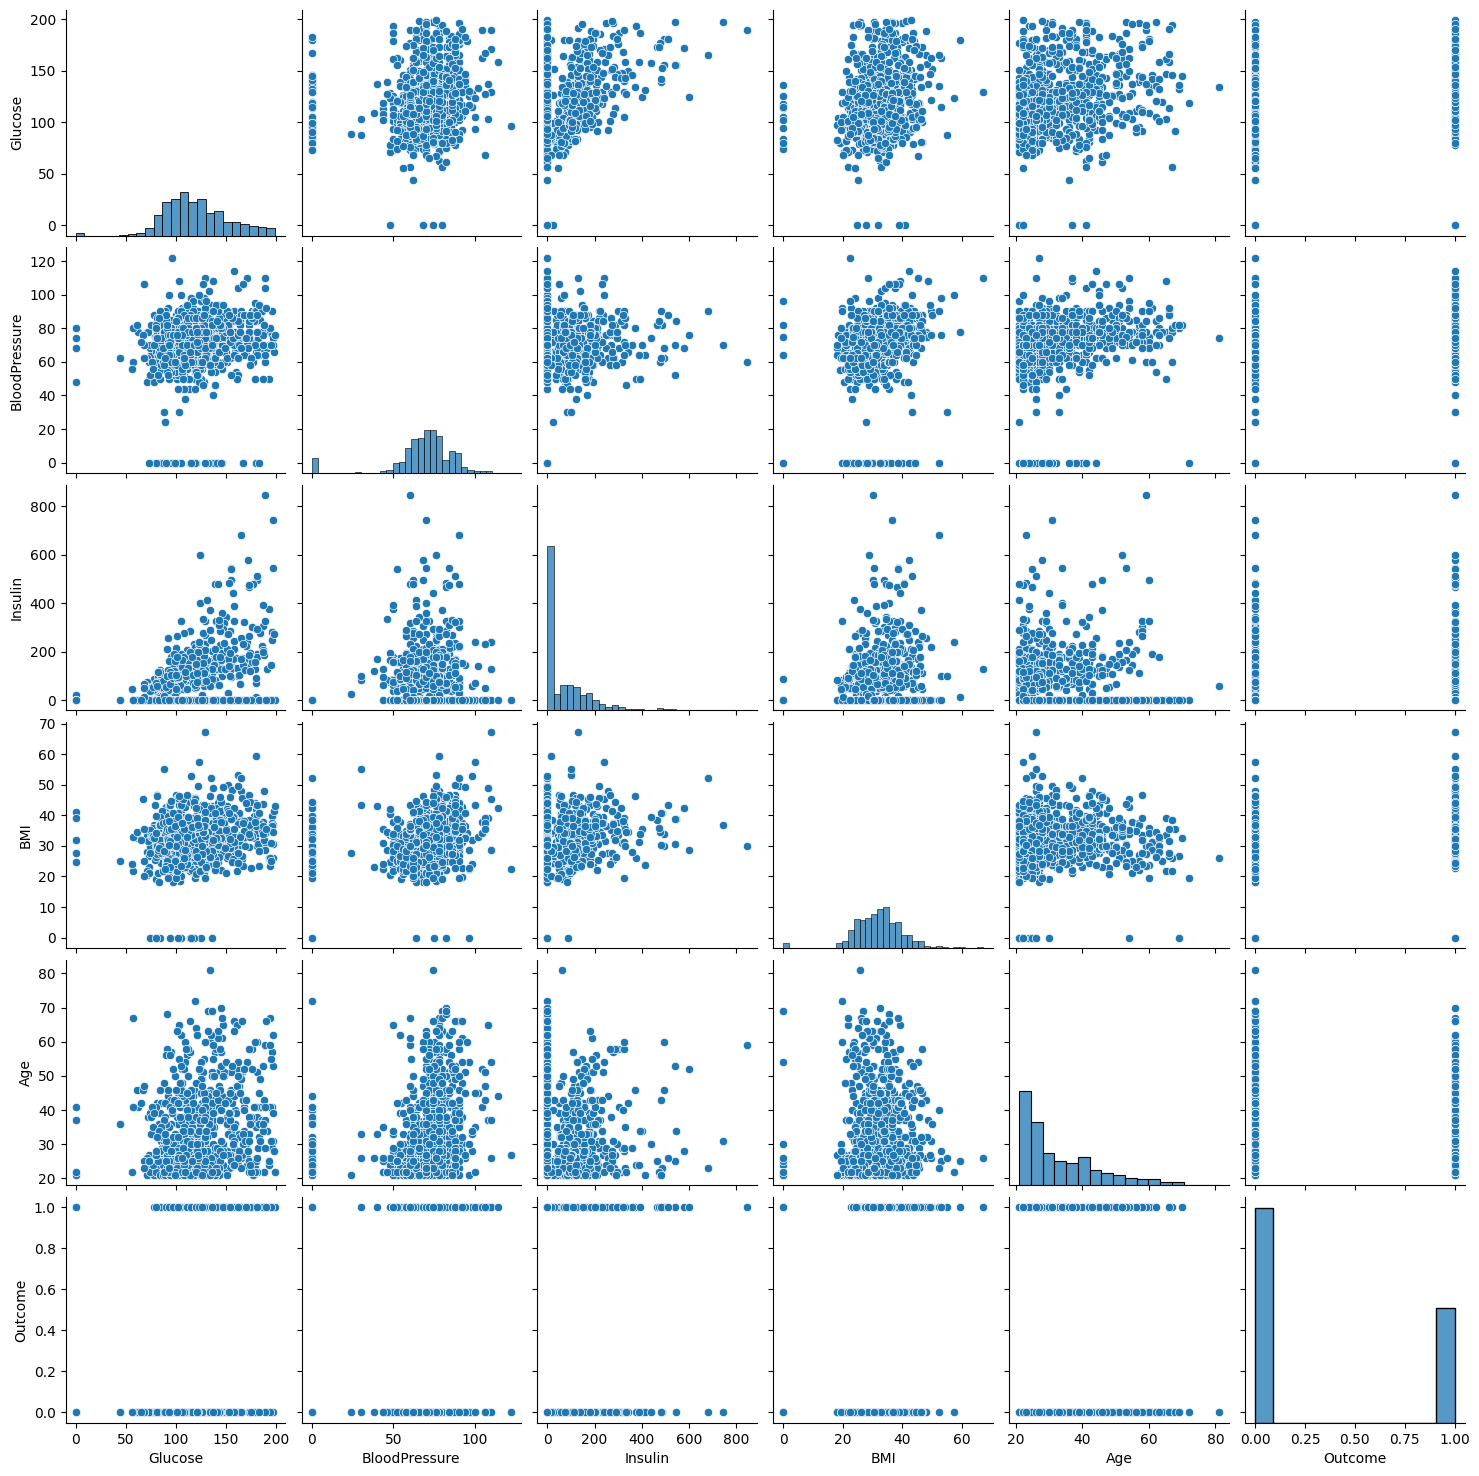

In [5]:
columns_to_drop = ['SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction']
#sns.pairplot(df=df.drop(columns_to_drop, axis=1))
df_plot = df.drop(columns_to_drop, axis=1)
df_plot.head()
sns.pairplot(df_plot)

Normalizing as the data from each column is on a vastly different scale, and the data does not seem to follow Gaussian distribution

In [10]:
# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(x_train)

# Apply the scaler on train and test data
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [11]:
x_test.shape

(154, 3)

In [12]:
#Fit model on training data
# Fit a model
training_model = LinearRegression()
model = training_model.fit(x_train, y_train)
predictions = training_model.predict(x_test)

# Create line coordinates
x_line = np.empty(x_test.shape)

#iterate through the number of columns in x_test (x_test.shape = (154, 8))
for i in range(x_test.shape[1]):
    x_line[:, i] = np.linspace(np.min(x_test[:,i]), np.max(x_test[:,i]), num=x_test.shape[0])
y_line = training_model.predict(x_line)

print('Intercept: \n', training_model.intercept_)
print('Coefficients: \n', training_model.coef_)


Intercept: 
 [82.59503901]
Coefficients: 
 [[ 1.53748726 62.35187857 36.50294397]]


In [13]:
# Predictions
predictions[0:10]

array([[123.22399343],
       [105.59198181],
       [117.51186469],
       [123.01615259],
       [114.81198903],
       [135.42181611],
       [133.24139458],
       [141.6758699 ],
       [112.01313957],
       [130.34728906]])

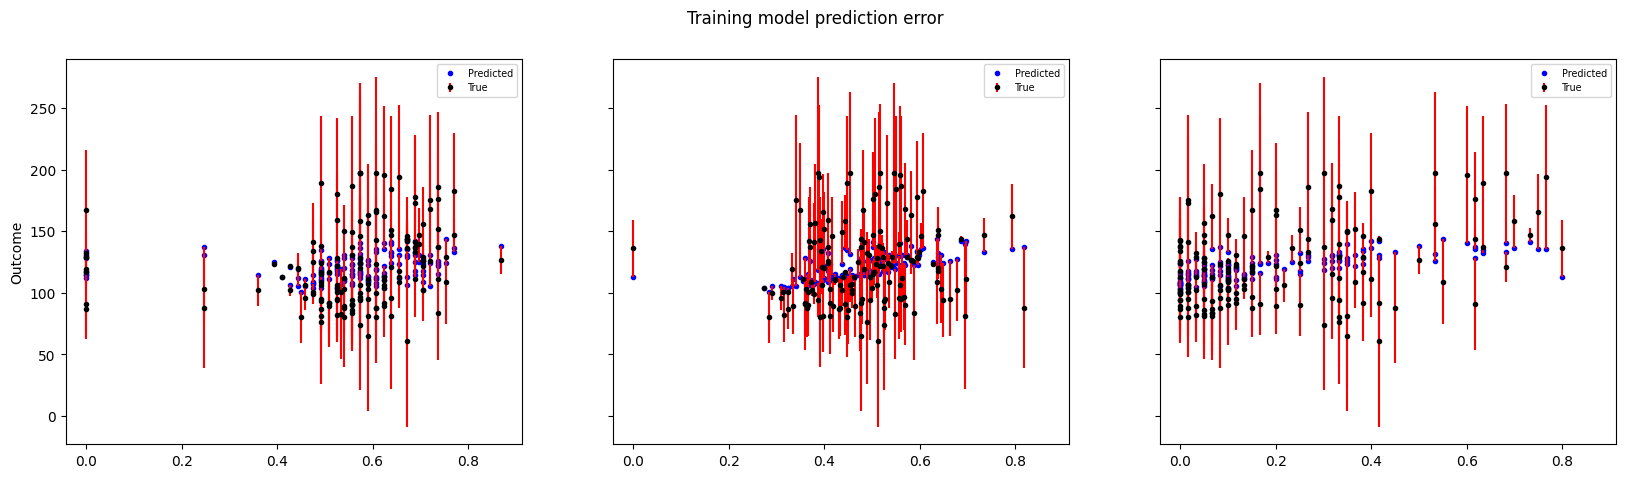

In [14]:
## Plot the errors
fig, ax = plt.subplots(1, x_test.shape[1], sharey=True, sharex=True, figsize=(20,5))
fig.suptitle("Training model prediction error")
ax[0].set_ylabel(df.columns[8])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(x_test.shape[1]):
    ax[i].errorbar(x_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(x_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

In [15]:
print ("R2 Score:", round (model.score(x_test, y_test), 8))

R2 Score: 0.12326242


The r^2 score for my model is 0.28 (28%), therefore 28% of the variation in my dependent variables (Blood pressure, BMI, Age) explains the variation in my independent variable.

This number is relatively low, which means that some of my independent variables can be difficult to explain in relation to each other. For example, someone with a high BMI might be overweight due to bad health which leads to diabetes, however they could also be a body builder who is in perfect health, weighing more due to their lifestyle. High Blood pressure is known to have ties to cholesterol due to types of fats and salt in the diet, meanwhile diabetes is due to blood sugar levels which may be more affected by sugary foods. Someone with a low BMI could still have type 1 diabetes as their body does not produce insulin. As a result, although these independent factors are likely to affect someone's probability of having diabetes, they can also change due to different human lifestyles.